## Setup

In [214]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style("darkgrid")
from pylab import *
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from scipy.stats import boxcox
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# load data
cars = pd.read_csv('C:/Users/melan/OneDrive/Documents/Entity/Final Project/Car-Sales-Data.csv')
cars.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


## Data Wrangling

In [3]:
# rename the engine type column
cars.rename(columns={'Engine Type' : 'EngineType'}, inplace=True)
cars.head(10)

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [4]:
# drop irrelevant variables registration and model
cars.drop(['Registration','Model'], axis=1, inplace=True)
cars.head(10)

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,2016
6,BMW,6100.0,sedan,438,2.0,Gas,1997
7,Audi,14200.0,vagon,200,2.7,Diesel,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,1999


In [5]:
# delete NaN values
cars.dropna(inplace=True)
cars1=cars.dropna().reset_index(drop=True)
cars1.head(10)

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,2016
6,BMW,6100.0,sedan,438,2.0,Gas,1997
7,Audi,14200.0,vagon,200,2.7,Diesel,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,1999


In [6]:
# drop any rows that have 0 in the miles column
cars2 = cars1[cars1.Mileage != 0]
cars2.head(10)

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
6,BMW,6100.0,sedan,438,2.0,Gas,1997
7,Audi,14200.0,vagon,200,2.7,Diesel,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,1999
10,Renault,11950.0,vagon,177,1.5,Diesel,2011


### The data looks much cleaner. Now, need to convert non numeric variables to numeric.

In [7]:
# check to see which variables are non numeric
cars2.dtypes

Brand          object
Price         float64
Body           object
Mileage         int64
EngineV       float64
EngineType     object
Year            int64
dtype: object

 Brand, Body, and EngineType need to be converted. First, we need to check levels of each variable to see how to recode it.

In [8]:
# levels of Brand
cars2['Brand'].value_counts(sort=True)

Volkswagen       854
Mercedes-Benz    768
BMW              622
Toyota           490
Renault          434
Audi             410
Mitsubishi       300
Name: Brand, dtype: int64

In [9]:
# levels of Body
cars2['Body'].value_counts(sort=True)

sedan        1505
crossover     740
van           612
other         383
vagon         374
hatch         264
Name: Body, dtype: int64

In [10]:
# Levels of EngineType
cars2['EngineType'].value_counts(sort=True)

Diesel    1766
Petrol    1417
Gas        590
Other      105
Name: EngineType, dtype: int64

We'll need to recode 7 levels for the Brand, 6 for the Body, and 4 for the Engine Type

### Recoding

In [11]:
# recoding Brand
cleanup = {"Brand" : {"Volkswagen" : 0, "Mercedes-Benz" : 1, "BMW" : 2, "Toyota" : 3, "Renault" : 4, "Audi" : 5, "Mitsubishi" : 6}}
cars2.replace(cleanup, inplace=True)
cars2.head()

C:\Users\melan\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,2,4200.0,sedan,277,2.0,Petrol,1991
1,1,7900.0,van,427,2.9,Diesel,1999
2,1,13300.0,sedan,358,5.0,Gas,2003
3,5,23000.0,crossover,240,4.2,Petrol,2007
4,3,18300.0,crossover,120,2.0,Petrol,2011


In [12]:
# recoding Body
cleanup = {"Body" : {"sedan" : 0, "crossover" : 1, "van" : 2, "other" : 3, "vagon" : 4, "hatch" : 5}}
cars2.replace(cleanup, inplace=True)
cars2.head()

C:\Users\melan\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,2,4200.0,0,277,2.0,Petrol,1991
1,1,7900.0,2,427,2.9,Diesel,1999
2,1,13300.0,0,358,5.0,Gas,2003
3,5,23000.0,1,240,4.2,Petrol,2007
4,3,18300.0,1,120,2.0,Petrol,2011


In [13]:
# recode Engine Type
cleanup = {"EngineType" : {"Diesel" : 0, "Petrol" : 1, "Gas" : 2, "Other" : 3}}
cars2.replace(cleanup, inplace=True)
cars2.head()

C:\Users\melan\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,2,4200.0,0,277,2.0,1,1991
1,1,7900.0,2,427,2.9,0,1999
2,1,13300.0,0,358,5.0,2,2003
3,5,23000.0,1,240,4.2,1,2007
4,3,18300.0,1,120,2.0,1,2011


Awesome! Now we're ready to start analysis.

## Exploratory Analyses

### For some exploratory analysis, we can do a correlation matrix, look at descriptive statistics, make a few plots for each variable, and finally play around in Tableau.

In [14]:
# pull up our data
cars2.head()

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,2,4200.0,0,277,2.0,1,1991
1,1,7900.0,2,427,2.9,0,1999
2,1,13300.0,0,358,5.0,2,2003
3,5,23000.0,1,240,4.2,1,2007
4,3,18300.0,1,120,2.0,1,2011


How about we get a more visual representation?

In [15]:
# make a correlation matrix
cars2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
Brand,1.0,-0.072,-0.026,-0.09,-0.017,0.14,0.027
Price,-0.072,1.0,-0.12,-0.44,0.055,-0.061,0.47
Body,-0.026,-0.12,1.0,-0.0037,-0.062,-0.16,0.035
Mileage,-0.09,-0.44,-0.0037,1.0,0.025,-0.052,-0.63
EngineV,-0.017,0.055,-0.062,0.025,1.0,0.058,-0.031
EngineType,0.14,-0.061,-0.16,-0.052,0.058,1.0,-0.15
Year,0.027,0.47,0.035,-0.63,-0.031,-0.15,1.0


From a glance, it looks as though the year of a used car is correlated with the price of a used car...which makes perfect sense. The year and the body are also mildly correlated, as are the engine type and the enginev. But these are not correlated very much, so really, we should focus more on the year vs the price.

#### Another way of doing some exploratory analyses is by looking at the descriptive stats.

In [16]:
cars2.describe()

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
count,3878.000000,3878.000000,3878.000000,3878.000000,3878.000000,3878.000000,3878.000000
mean,2.338319,17417.471423,1.528881,169.772563,2.767581,0.750903,2006.020113
std,1.930981,21599.147081,1.618365,100.214150,5.023970,0.808673,6.556247
min,0.000000,600.000000,0.000000,1.000000,0.600000,0.000000,1969.000000
25%,1.000000,6900.000000,0.000000,98.250000,1.800000,0.000000,2002.000000
50%,2.000000,10999.000000,1.000000,161.000000,2.200000,1.000000,2007.000000
75%,4.000000,20300.000000,3.000000,232.000000,3.000000,1.000000,2011.000000
max,6.000000,300000.000000,5.000000,980.000000,99.990000,3.000000,2016.000000


Looking at the data, we see we have 3878 total rows of data (after our wrangling and cleaning up). Mean price of a used car is 17,417 dollars-not a bad price since most of these cars are luxury brands. Mean mileage is 169.8 miles. Impressive for a used car. This seems to have come from previous owners who took good care of their vehicles. And the mean year is a 2006. So, in 2022, some of these cars are an average of 16 years old. These are some fantastic used cars!

On further glance, the minimum and maximum price of a car is 600 and 300000. Quite a range! One, or both of these prices, may be an outlier. We'll have to do some more work to see. The minimum mileage is only 1-which means this car may not actually be used, and might need to be dropped from the data. The maximum mileage is 980 miles, which further confirms that our cars in this dataset are well taken care of. And interestingly, the newest car is from 2016, only six years ago, while the oldest car is from 1969! We have a classic car in the mix. Would be interesting to see what the price of that car is.

### Why don't we play around with some histographs and plots?

<AxesSubplot:xlabel='Price', ylabel='Count'>

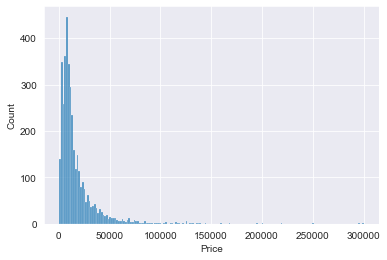

In [17]:
# look at a histograph for each continuous variable
sns.histplot(cars2['Price'])

Wow, this is pretty positively skewed. We'll need to do a transformation on this.

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

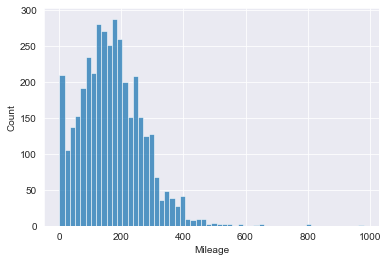

In [18]:
sns.histplot(cars2['Mileage'])

This one is also positively skewed but not as bad as the price.

#### Next we can do the categorical variables by using box plots.

<AxesSubplot:xlabel='Brand'>

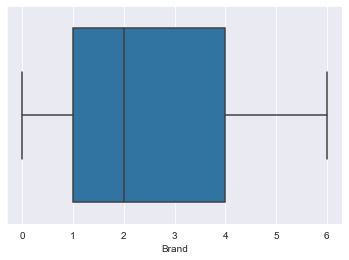

In [20]:
## look at a box plot for the categorical variables
sns.boxplot(x=cars2["Brand"])

<AxesSubplot:xlabel='Body'>

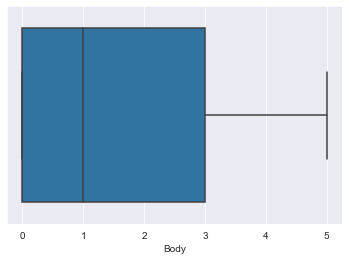

In [21]:
sns.boxplot(x=cars2["Body"])

<AxesSubplot:xlabel='EngineV'>

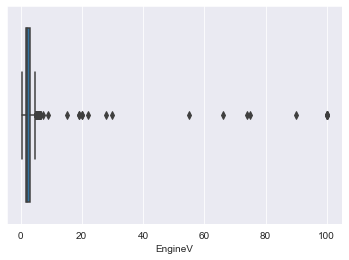

In [22]:
sns.boxplot(x=cars2["EngineV"])

<AxesSubplot:xlabel='EngineType'>

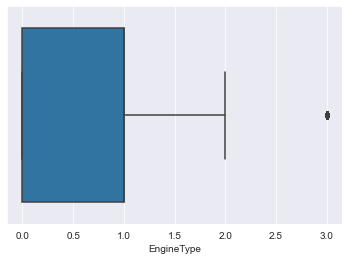

In [23]:
sns.boxplot(x=cars2["EngineType"])

<AxesSubplot:xlabel='Year'>

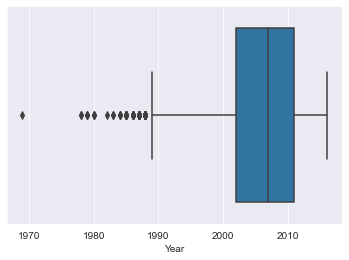

In [24]:
sns.boxplot(x=cars2["Year"])

Some observations by looking at these boxplots: The output shows that the median amount of car brands are BMWs. Also, 50% of the car brands are either BMWs and Toyotas. Median body types are crossovers, while half of the cars are a mix of sedans and crossovers. There seems to be a ton of outliers in the enginev. Almost all the engine types fall somewhere between Diesel and Petrol; there is definitely an outlier there. And in the Year variable, most cars are from 2004 to about 2011, with some outliers in the years between 1969 and 1989.

#### Finally, in our exploratory analyses, we'll look at some of the data in Tableau. Then, we can wrap up this part and continue on to the actual analysis.

## Multiple Linear Regression

In order to start our analysis, we need to test for Linearity and Normality.

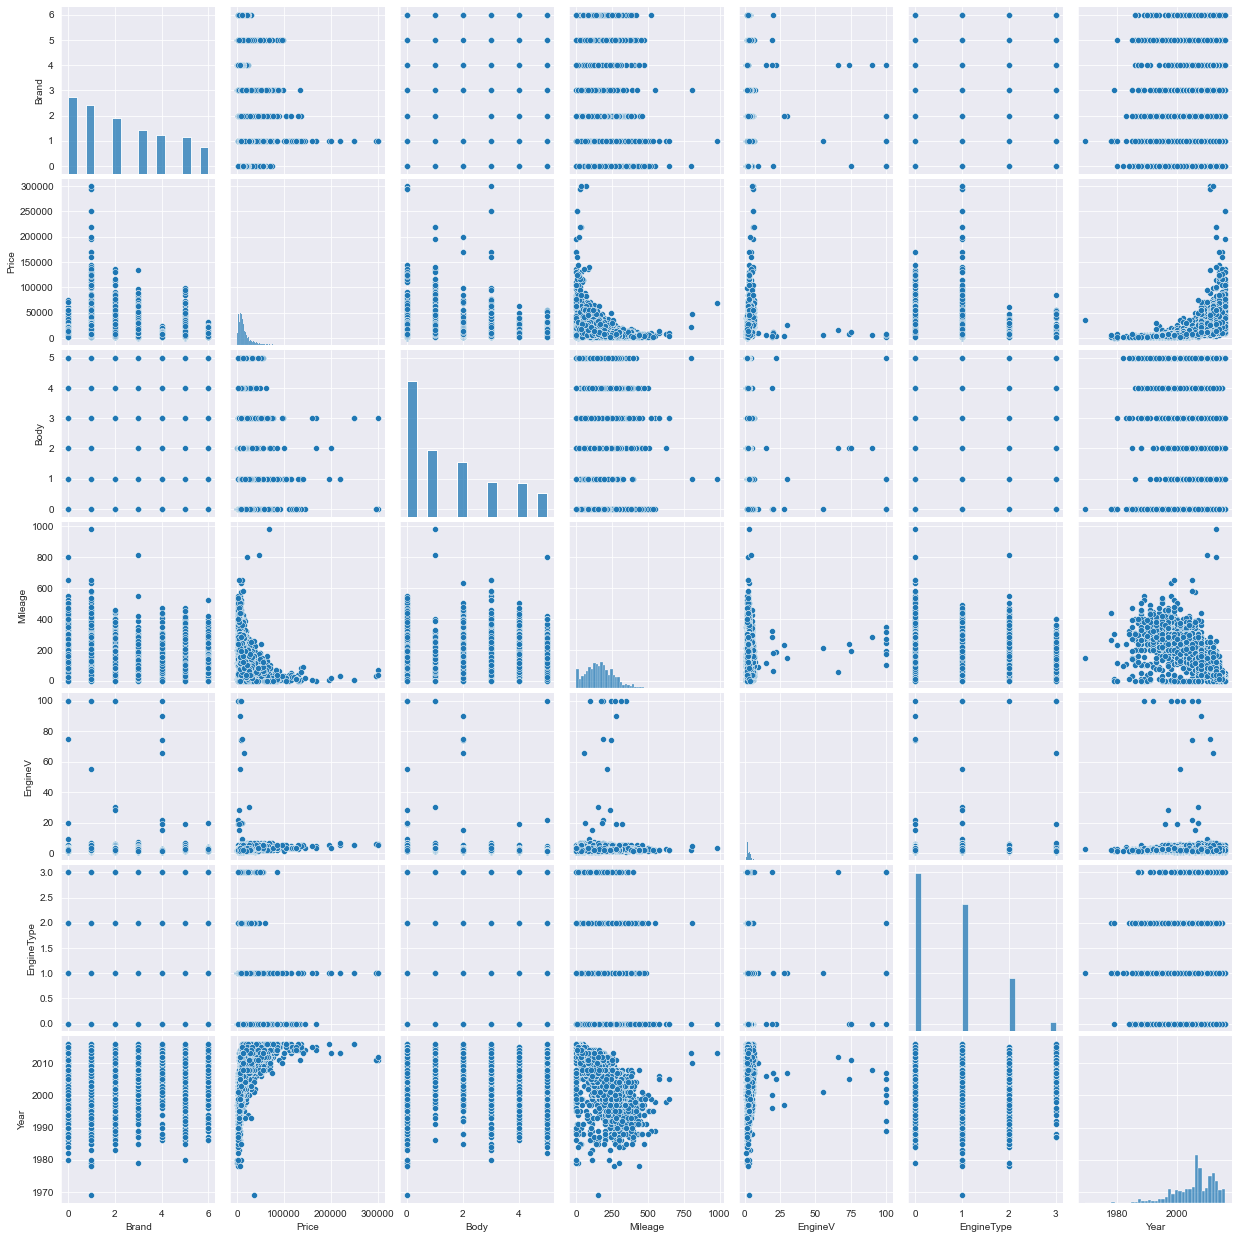

In [25]:
# Look for Normality
sns.pairplot(cars2)

Seems to be quite a lot of skewed data here, so let's do some transforming.

In [29]:
# Transform the positively skewed data
# Price
cars2['PriceSQRT'] = np.sqrt(cars2['Price'])
cars2.head()

C:\Users\melan\AppData\Local\Temp/ipykernel_20168/1664876835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2['PriceSQRT'] = np.sqrt(cars2['Price'])


,Brand,Price,Body,Mileage,EngineV,EngineType,Year,PriceSQRT
0,2,4200.0,0,277,2.0,1,1991,64.807407
1,1,7900.0,2,427,2.9,0,1999,88.881944
2,1,13300.0,0,358,5.0,2,2003,115.325626
3,5,23000.0,1,240,4.2,1,2007,151.657509
4,3,18300.0,1,120,2.0,1,2011,135.277493


<AxesSubplot:>

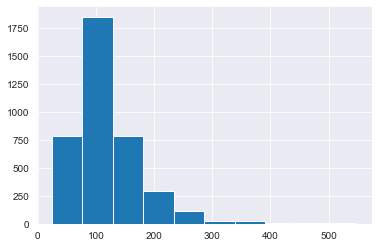

In [31]:
cars2.PriceSQRT.hist()

That's a little better. Let's try another transformation to see if we can make it more normal.

In [32]:
cars2['PriceLOG'] = np.log(cars2['Price'])
cars2.head()

C:\Users\melan\AppData\Local\Temp/ipykernel_20168/3835131513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2['PriceLOG'] = np.log(cars2['Price'])


,Brand,Price,Body,Mileage,EngineV,EngineType,Year,PriceSQRT,PriceLOG
0,2,4200.0,0,277,2.0,1,1991,64.807407,8.342840
1,1,7900.0,2,427,2.9,0,1999,88.881944,8.974618
2,1,13300.0,0,358,5.0,2,2003,115.325626,9.495519
3,5,23000.0,1,240,4.2,1,2007,151.657509,10.043249
4,3,18300.0,1,120,2.0,1,2011,135.277493,9.814656


<AxesSubplot:>

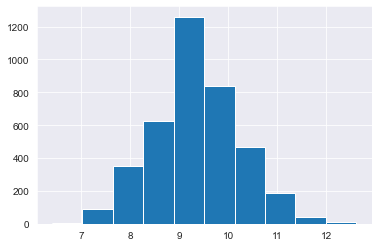

In [33]:
cars2.PriceLOG.hist()

Oh, yeah, way better! Moving on.

In [34]:
# Transform the positively skewed data
# Mileage
cars2['MileageSQRT'] = np.sqrt(cars2['Mileage'])
cars2.head()

C:\Users\melan\AppData\Local\Temp/ipykernel_20168/4276422052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2['MileageSQRT'] = np.sqrt(cars2['Mileage'])


,Brand,Price,Body,Mileage,EngineV,EngineType,Year,PriceSQRT,PriceLOG,MileageSQRT
0,2,4200.0,0,277,2.0,1,1991,64.807407,8.342840,16.643317
1,1,7900.0,2,427,2.9,0,1999,88.881944,8.974618,20.663978
2,1,13300.0,0,358,5.0,2,2003,115.325626,9.495519,18.920888
3,5,23000.0,1,240,4.2,1,2007,151.657509,10.043249,15.491933
4,3,18300.0,1,120,2.0,1,2011,135.277493,9.814656,10.954451


<AxesSubplot:>

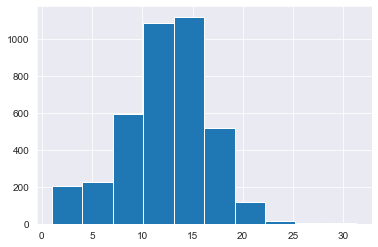

In [35]:
cars2.MileageSQRT.hist()

That's not too bad. Let's fix our outliers. First, we'll pull up the data using box plots.

### Identifying and Capping Outliers

<AxesSubplot:>

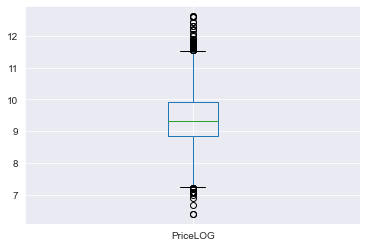

In [158]:
# dependent variable
cars2.boxplot('PriceLOG')

In [159]:
# Finding the 1st and 3rd quartiles
percentile25 = cars2['PriceLOG'].quantile(0.25)
percentile75 = cars2['PriceLOG'].quantile(0.75)
print(percentile25)
print(percentile75)

8.83927669058535
9.918376165029878


In [160]:
# getting the iqr
iqr = percentile75 - percentile25
print(iqr)

1.0790994744445275


In [161]:
# finding the upper and lower limits
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

11.537025376696668
7.220627478918559


In [162]:
cars2[cars2['PriceLOG']> upper_limit]
cars2[cars2['PriceLOG'] < lower_limit]

,Brand,Price,Body,Mileage,EngineV,EngineType,Year,PriceSQRT,PriceLOG,MileageSQRT
128,5,600.00,0,112,1.6,1,1980,24.494897,6.396930,10.583005
267,3,600.00,0,10,1.5,1,1979,24.494897,6.396930,3.162278
462,0,1200.00,3,300,1.4,2,2000,34.641016,7.090077,17.320508
731,5,1350.00,4,400,1.9,0,1994,36.742346,7.207860,20.000000
877,0,1199.00,5,250,1.9,0,1994,34.626579,7.089243,15.811388
1307,1,1350.00,0,360,2.5,0,1989,36.742346,7.207860,18.973666
1475,4,999.00,0,430,2.0,2,1988,31.606961,6.906755,20.736441
1494,4,1350.00,0,100,1.7,1,1986,36.742346,7.207860,10.000000
1519,4,1150.00,5,250,1.4,1,1987,33.911650,7.047517,15.811388
1563,4,1200.00,0,240,1.7,2,1988,34.641016,7.090077,15.491933


In [163]:
cars3 = cars2[cars2['PriceLOG'] < upper_limit]
cars3.shape

(3835, 10)

In [164]:
# capping
cars3_cap = cars2.copy()
cars3_cap['PriceLOG'] = np.where(
    cars3_cap['PriceLOG'] > upper_limit,
    upper_limit,
    np.where(
        cars3_cap['PriceLOG'] < lower_limit,
        lower_limit,
        cars3_cap['PriceLOG']
    )
)

C:\Users\melan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\melan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


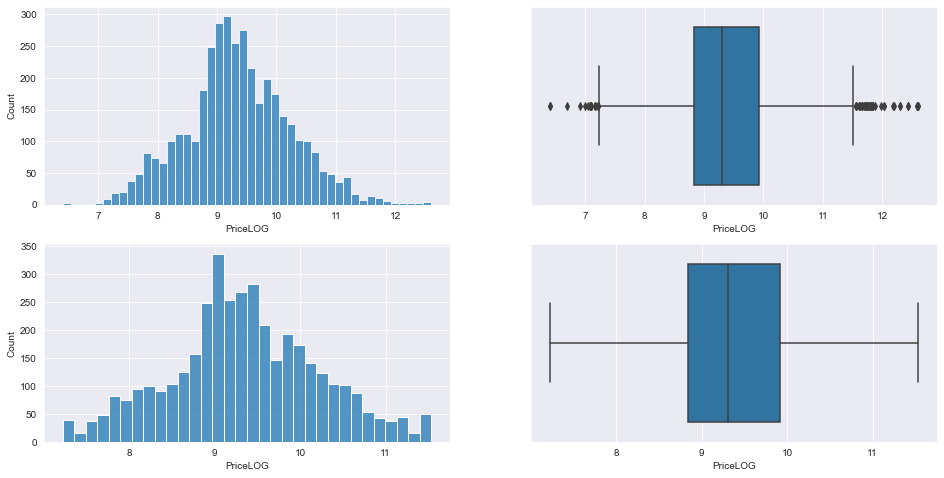

In [165]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(cars2['PriceLOG'])
plt.subplot(2,2,2)
sns.boxplot(cars2['PriceLOG'])
plt.subplot(2,2,3)
sns.histplot(cars3_cap['PriceLOG'])
plt.subplot(2,2,4)
sns.boxplot(cars3_cap['PriceLOG'])
plt.show()

Whew! Lot of work, but that looks a lot better. Let's do the other variable.

<AxesSubplot:>

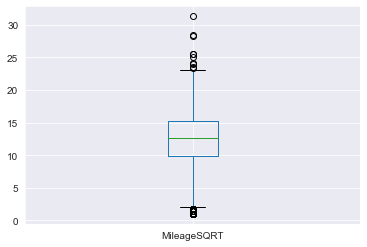

In [138]:
# independent variable
cars2.boxplot('MileageSQRT')

In [139]:
# Finding the 1st and 3rd quartiles
percentile25 = cars2['MileageSQRT'].quantile(0.25)
percentile75 = cars2['MileageSQRT'].quantile(0.75)
print(percentile25)
print(percentile75)

9.912089795225299
15.231546211727817


In [140]:
# getting the iqr
iqr = percentile75 - percentile25
print(iqr)

5.319456416502518


In [141]:
# finding the upper and lower limits
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

23.210730836481595
1.9329051704715212


In [142]:
cars2[cars2['MileageSQRT'] > upper_limit]
cars2[cars2['MileageSQRT'] < lower_limit]

,Brand,Price,Body,Mileage,EngineV,EngineType,Year,PriceSQRT,PriceLOG,MileageSQRT
28,5,2900.00,0,1,2.3,2,1989,53.851648,7.972466,1.0
35,2,67500.00,1,1,2.5,0,2016,NaN,11.119883,1.0
92,0,31500.00,1,1,2.0,1,2014,177.482393,10.357743,1.0
160,1,169000.00,3,1,4.7,1,2015,NaN,12.037654,1.0
180,0,14500.00,0,1,1.6,3,2016,120.415946,9.581904,1.0
...,...,...,...,...,...,...,...,...,...,...
3881,2,62900.00,1,1,2.0,0,2016,NaN,11.049301,1.0
3919,0,1296.75,0,1,1.6,1,1980,36.010415,7.167616,1.0
3939,2,3100.00,4,1,2.0,0,2002,55.677644,8.039157,1.0
3954,4,4500.00,3,1,1.5,0,2007,67.082039,8.411833,1.0


In [143]:
cars4 = cars2[cars2['MileageSQRT'] < upper_limit]
cars4.shape

(3868, 10)

In [144]:
# capping
cars4_cap = cars2.copy()
cars4_cap['MileageSQRT'] = np.where(
    cars4_cap['MileageSQRT'] > upper_limit,
    upper_limit,
    np.where(
        cars4_cap['MileageSQRT'] < lower_limit,
        lower_limit,
        cars4_cap['MileageSQRT']
    )
)

C:\Users\melan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\melan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


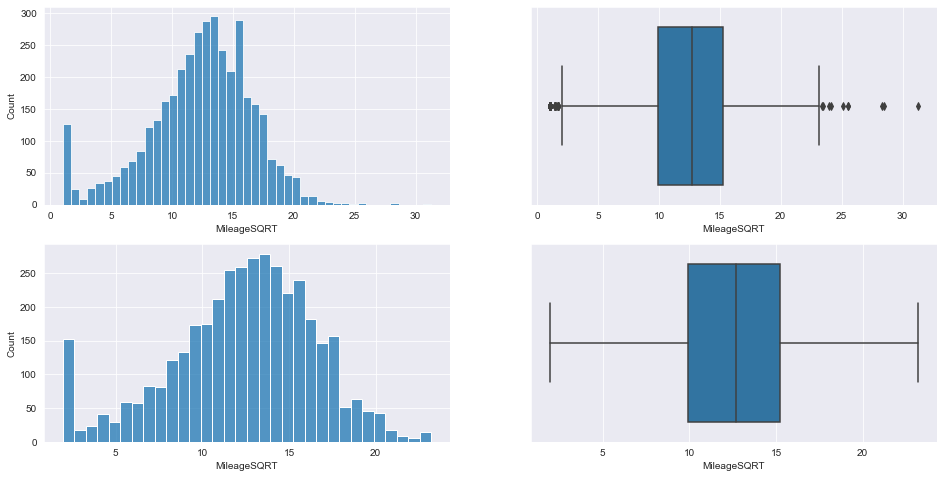

In [146]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(cars2['MileageSQRT'])
plt.subplot(2,2,2)
sns.boxplot(cars2['MileageSQRT'])
plt.subplot(2,2,3)
sns.histplot(cars4_cap['MileageSQRT'])
plt.subplot(2,2,4)
sns.boxplot(cars4_cap['MileageSQRT'])
plt.show()

Way better. How about we get to our assumptions and testing?

## Testing for Homoscedasticity
### Creating the Basic Model
We can plug in our y (the PriceSQRT Variable) and our x (our other variables, minus Mileage but including MileageSQRT)

In [157]:
#checking our data
cars4_cap.head()

,Brand,Price,Body,Mileage,EngineV,EngineType,Year,PriceSQRT,PriceLOG,MileageSQRT
0,2,4200.0,0,277,2.0,1,1991,64.807407,8.342840,16.643317
1,1,7900.0,2,427,2.9,0,1999,88.881944,8.974618,20.663978
2,1,13300.0,0,358,5.0,2,2003,115.325626,9.495519,18.920888
3,5,23000.0,1,240,4.2,1,2007,151.657509,10.043249,15.491933
4,3,18300.0,1,120,2.0,1,2011,135.277493,9.814656,10.954451


In [170]:
x = cars4_cap[['Brand', 'Body', 'MileageSQRT', 'EngineV', 'EngineType', 'Year']]
y = cars4_cap['PriceLOG']

In [171]:
carsmodel = sm.OLS(y,x).fit()

In [172]:
pred_val = carsmodel.fittedvalues.copy()
true_val = cars4_cap['PriceLOG'].values.copy()
residual = true_val - pred_val

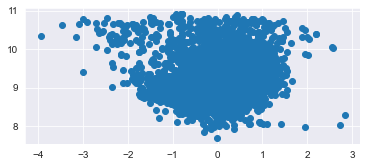

In [173]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [176]:
# run a Breusch Pagan test
sms.diagnostic.het_breuschpagan(residual, cars4_cap[['MileageSQRT']])

(549.9281244436103, nan, 640.6325999529192, 6.101743246343659e-131)

The numbers in the output above mean the following, with left to right discussed from top to bottom:

549.92: This is the lagrange multiplier statistic.
Ignore!

nan: This is the p value for the lagrange multiplier statistic.
Ignore!

640.63: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
6.101743246343659e-131: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means you have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic.

(array([   4.,   50.,  258.,  425., 1077., 1056.,  646.,  277.,   72.,
          13.]),
 array([3.13098469, 3.34553771, 3.56009073, 3.77464374, 3.98919676,
        4.20374978, 4.4183028 , 4.63285582, 4.84740884, 5.06196186,
        5.27651488]),
 <BarContainer object of 10 artists>)

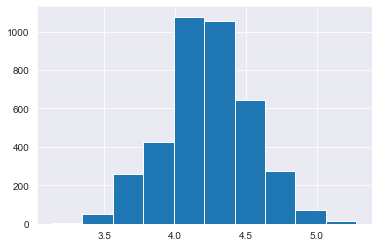

In [187]:
# fixing heteroscedasticity using boxcox
transformed, _ = boxcox(cars4_cap['PriceLOG'])
plt.hist(transformed)

In [195]:
x = transformed
model1 = sm.OLS(y,x).fit()

In [190]:
pred_val = model1.fittedvalues.copy()
true_val = cars4_cap['PriceLOG'].values.copy()
residual = true_val - pred_val

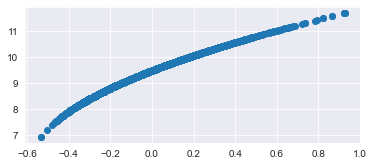

In [191]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### Testing for Multicollinearity

<AxesSubplot:>

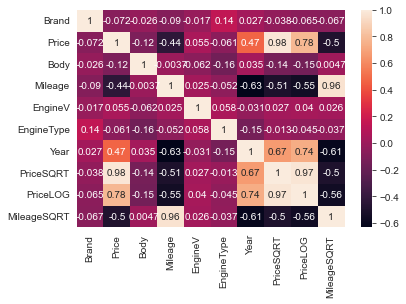

In [194]:
sns.heatmap(cars4_cap.corr(), annot=True)

The correlations between Year and Price (and subsenquently, Year and PriceSQRT and PriceLOG) are pretty high once again!

### Interpreting the Results

In [192]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               PriceLOG   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.463e+06
Date:                Sun, 11 Sep 2022   Prob (F-statistic):                        0.00
Time:                        02:52:09   Log-Likelihood:                          476.22
No. Observations:                3878   AIC:                                     -950.4
Df Residuals:                    3877   BIC:                                     -944.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.2142      0.001   2731.926      0.000       2.213       2.216
==============================================================================
Omnibus:                      252.723   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.942
Skew:                           0.611   Prob(JB):                     3.35e-70
Kurtosis:                       3.696   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Because the p value is < .05, we can determine that the predictor variables has a significant effect on the price of a used car. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for 99% of the variance in explaining used car prices.

## Supervised Machine Learning, Using Linear Regression

#### Now that we've done some analyses, our goal is to accurately predict used car prices.
First, we have to wrangle our data to make sure it's in arrays.

In [197]:
cars4_cap.head(10)

,Brand,Price,Body,Mileage,EngineV,EngineType,Year,PriceSQRT,PriceLOG,MileageSQRT
0,2,4200.0,0,277,2.0,1,1991,64.807407,8.342840,16.643317
1,1,7900.0,2,427,2.9,0,1999,88.881944,8.974618,20.663978
2,1,13300.0,0,358,5.0,2,2003,115.325626,9.495519,18.920888
3,5,23000.0,1,240,4.2,1,2007,151.657509,10.043249,15.491933
4,3,18300.0,1,120,2.0,1,2011,135.277493,9.814656,10.954451
6,2,6100.0,0,438,2.0,2,1997,78.102497,8.716044,20.928450
7,5,14200.0,4,200,2.7,0,2006,119.163753,9.560997,14.142136
8,4,10799.0,4,193,1.5,0,2012,103.918237,9.287209,13.892444
9,0,1400.0,3,212,1.8,2,1999,37.416574,7.244228,14.560220
10,4,11950.0,4,177,1.5,0,2011,109.316056,9.388487,13.304135


In [198]:
cars4_cap.dropna(inplace = True)
cars4_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697 entries, 0 to 4024
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        3697 non-null   int64  
 1   Price        3697 non-null   float64
 2   Body         3697 non-null   int64  
 3   Mileage      3697 non-null   int64  
 4   EngineV      3697 non-null   float64
 5   EngineType   3697 non-null   int64  
 6   Year         3697 non-null   int64  
 7   PriceSQRT    3697 non-null   float64
 8   PriceLOG     3697 non-null   float64
 9   MileageSQRT  3697 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 317.7 KB


In [202]:
# we need to drop Price, PriceSQRT, and change the remaining floats to ints
cars4_cap['EngineV'] = cars4_cap['EngineV'].astype(int)
cars4_cap['PriceLOG'] = cars4_cap['PriceLOG'].astype(int)
cars4_cap['MileageSQRT'] = cars4_cap['MileageSQRT'].astype(int)
cars4_cap.drop(['Price', 'PriceSQRT'], axis = 1, inplace = True)
cars4_cap.head(10)

KeyError: "['Price' 'PriceSQRT'] not found in axis"

In [203]:
# forgot to add mileage!
cars4_cap.drop(['Mileage'], axis = 1, inplace = True)
cars4_cap.head(10)

,Brand,Body,EngineV,EngineType,Year,PriceLOG,MileageSQRT
0,2,0,2,1,1991,8,16
1,1,2,2,0,1999,8,20
2,1,0,5,2,2003,9,18
3,5,1,4,1,2007,10,15
4,3,1,2,1,2011,9,10
6,2,0,2,2,1997,8,20
7,5,4,2,0,2006,9,14
8,4,4,1,0,2012,9,13
9,0,3,1,2,1999,7,14
10,4,4,1,0,2011,9,13


In [205]:
# define our x and y
x = cars4_cap[['Brand', 'Body', 'EngineV', 'EngineType', 'Year','MileageSQRT']]
y = cars4_cap['PriceLOG']


In [206]:
x.head(10)

,Brand,Body,EngineV,EngineType,Year,MileageSQRT
0,2,0,2,1,1991,16
1,1,2,2,0,1999,20
2,1,0,5,2,2003,18
3,5,1,4,1,2007,15
4,3,1,2,1,2011,10
6,2,0,2,2,1997,20
7,5,4,2,0,2006,14
8,4,4,1,0,2012,13
9,0,3,1,2,1999,14
10,4,4,1,0,2011,13


In [207]:
y.head(10)

0      8
1      8
2      9
3     10
4      9
6      8
7      9
8      9
9      7
10     9
Name: PriceLOG, dtype: int32

### Train Test Split


In [208]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2218, 6) (2218,)
(1479, 6) (1479,)


In the x_train dataset, there are 2218 rows and 6 columns, and in the x_test dataset, there are 1479 rows and 6 columns. So we can see how the training and testing data is broken up.

### Create the Linear Regression Model

In [209]:
# running linear regression model
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

Awesome, it worked!

## Examine Predictions
#### Now that we've prepped our data, we'll examine the predictions.

In [210]:
# checking the preditions
predictions = lm.predict(x_test)
predictions

array([8.5338134 , 7.50566046, 8.45229804, ..., 8.80995547, 9.35420842,
       9.1599486 ])

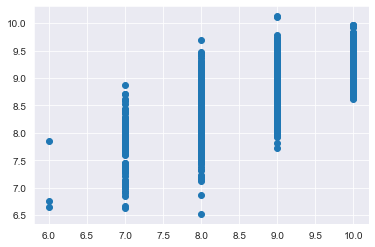

In [211]:
# Plotting the huge array
plt.scatter(y_test, predictions)

In [212]:
# quantifying with accuracy score
print("Score:", lm.score(x_test, y_test))

Score: 0.5244922251095536


This means our model is accurate approximately 52% of the time. That's a little over half the time.

### Examining Error
#### Because our model isn't 100 percent perfect, we should examine some of the error.


### Mean Absolute Error (MAE)

In [215]:
metrics.mean_absolute_error(y_test, predictions)

0.4647755950076568

Since the lowest you can have is 0, a value of 0.46 is pretty good!

### Mean Squared Error (MSE)

In [217]:
metrics.mean_squared_error(y_test, predictions)

0.3467024501392138

### Root Mean Squared Error (RMSE)

In [218]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.5888144445741916

0.58 is really close to 0.

## Cross Validation
#### Just to be safe, why not cross validate?

### k-Fold Cross Validation

In [219]:
# load K fold packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [220]:
# create the folds
kfold = KFold(3, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [   0    1    2 ... 3689 3695 3696], test: [   3    4    6 ... 3692 3693 3694]
train: [   2    3    4 ... 3692 3693 3694], test: [   0    1    8 ... 3688 3695 3696]
train: [   0    1    3 ... 3694 3695 3696], test: [   2    5    9 ... 3686 3687 3689]


C:\Users\melan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [221]:
print(cross_val_score(lm, x,y, cv=3))

[0.50175517 0.54377193 0.51588539]


So all three of our models are pretty much 50% accurate.